In [1]:
import paddle
import os
import random
import zipfile
import numpy as np 
import matplotlib.pyplot as plt
import json

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized


In [2]:
src_path="data/data20519/Rumor_Dataset.zip"
target_path="dataset"
if not os.path.isdir(target_path):
    z=zipfile.ZipFile(src_path)
    z.extractall(path=target_path)
    z.close()

In [3]:
data_path="dataset/Chinese_Rumor_Dataset-master/CED_Dataset"

rumor_path="dataset/Chinese_Rumor_Dataset-master/CED_Dataset/rumor-repost"
non_rumor_path="dataset/Chinese_Rumor_Dataset-master/CED_Dataset/non-rumor-repost"
original_path="dataset/Chinese_Rumor_Dataset-master/CED_Dataset/original-microblog"

rumors=[]
non_rumors=[]

for rumor in os.listdir(rumor_path):
    if rumor==".DS_Store":
        continue
    with open(os.path.join(original_path,rumor)) as f:
        content=f.read()
        content=json.loads(content)
        # print(content)
        one_data="0\t"+content["text"]+"\n"
        # print(one_data)
        rumors.append(one_data)

for non_rumor in os.listdir(non_rumor_path):
    if non_rumor==".DS_Store":
        continue
    with open(os.path.join(original_path,non_rumor)) as f:
        content=f.read()
        content=json.loads(content)
        one_data="1\t"+content["text"]+"\n"
        # print(one_data)
        non_rumors.append(one_data)
    

In [4]:
rumors

['0\t【看看人家的富二代】世界亿万富翁比尔盖茨的女儿，全身没有一个明显的名牌，没有开豪华跑车，没有拿奢侈品包包，没有艳丽的浓妆，只有明媚如清晨的朝阳，真正的淑女，从不炫耀自己拥有的一切！！！！！ \n',
 '0\t城管执法为什么要脱女贩的裤子？ 城管执法为什么要脱女贩的裤子？7月2日下午，惠州惠城区河南岸上马庄启明苑门前，城管对一名女商贩进行检查，女商贩遭城管拔掉车钥匙时，用剪刀将一城管刺伤，城管在制服女商贩的过程中强行剥掉她的内裤。（图为：女小商贩被几名城管按倒在地剥内裤。）\n',
 '0\t【图中可看出一个领导的情怀】某省某地纪委书记汪同志认为网民是暴民是敌人，但他对同是日籍网民的苍井空却是十分的暧昧......纪委书记大人爱憎分明！by网络 更多热点新闻请关注@新闻坊\n',
 '0\t转：朋友在英国刚刚看完新闻,说飞机上的人都活着,都活着,说副机长是恐怖分子,飞机在印度的一个岛上,他把机上的导航和信号全毁了。\n',
 '0\t四川1大学女生去参加庆祝,喝了很多酒，有个年轻帅对其百般调情挑逗，该女生终于答应与这个帅哥去酒店。房间里，该女生喝了些酒，慢慢地她开始觉得不清醒，然后就睡著了。当该女生再醒来时，发现自己全身赤裸地在满是血和冰的浴缸中，结果她发现有两条九寸长的割伤口在背部下方，原来，她的肾脏被偷了！\n',
 '0\t据说这是今天中午新浪微博上不去的原因……\n',
 '0\t【城管手中再添一人命】2013年7月26日早上8点20分左右。四川省达州万源有一个家庭贫因的17岁在校学生。把 自己在山上捡的野山菌拿到街上来卖，遭到城管殴打，送到医院抢救无效死亡，但目前消息被封锁。 试问正义何在？公理何在？ 求扩散步！！！[怒][怒]@假装在西安 @孔智勇- @徐昕 @时评聚焦 @袁腾飞\n',
 '0\t#北京说事#【谨防宝宝被拐】天津阿姨家邻居带着3岁儿子去超市，付账片刻发现孩子不见，立即找保安求助。保安很给力，马上对讲机通知关闭所有入口进行排查。最后找到了小孩，头发被剃了，衣服被换。人贩子团伙太恐怖，家长带小孩外出一定要非常谨慎! ps:上周北京就发生类似两起，大家小心！（转）\n',
 '0\t[双休日原来是这么来的] 1994年前后，中美入世谈判最艰难的时刻，美方突然向中方提出：在全世界都实行双休日的今天，中国必须尊重人权，也给中国人双休日，

In [5]:
non_rumors

['1\t【单反相机手动拍摄技巧】用专业的摄影技术将最美好的瞬间记录下来~ 速度mark ~~~ [耶]掌握摄影技巧， 做摄影达人就关注@照片这样拍\n',
 '1\t我们都是娑婆世界的众生，对情爱有着难以抗拒的执着。看着唤云，我想问问大家，面对爱你的人和你爱的人，你会如何抉择？\n',
 '1\t【快来看！好强大的中秋福利[花心]】据@成都老茶客 称，这家成都的公司福利太凶悍了！中秋节国庆节给员工发IPhone5、三亚双飞6日游、现金、手表、包包等，都让员工不知如何选择了。（via：成都商报） 内已经牛干了。。。。[泪流满面]\n',
 '1\t推荐≪华尔街日报≫今天出版的特别专题“人民币的崛起”。世界各地的记者从各个侧面对人民币在全球经济中的角色演变进行了深度分析与报道。http://t.cn/aoXXlY\n',
 '1\t【自榨花生油“无添加”未必安全】不少消费者青睐号称“无添加、纯正”的散装鲜榨花生油。然而，这些自榨花生油却隐患重重，有消费者向记者报料，最近在粤西市场随机购买的三份散装花生油样本，经省质量监督食品检验站检测，结果显示，高致癌物黄曲霉素B1超标均高达三倍。http://t.cn/zlOs6AU\n',
 '1\t #猫咪老师# 爱喝酒，爱蹭吃。爱胡乱唱歌、也爱整蛊。爱交际，更爱卖萌。爱和贵志拌嘴，关键时刻也爱变身保护他。我不是妖怪，更不是保护神，我就是我，我是猫咪老师！有人喜欢我吗？\n',
 '1\t【《看见》北大研讨会8•张志安】好的人物报道要能理解人，无论电视还是平媒。@张志安 老师为《看见》贡献了一套“通往人心”的方法论；他强调，为个体寻找行动原因时要慎重，因为这样很危险；他还别出心裁，帮柴静进行了一番职业规划，引发了全场会心的笑容。@CCTV看见\n',
 '1\t【晚安。土豆】我微笑时，如果你懂，只要握紧我的手，对我微笑就够了。我哭泣时，如果你懂，只要借我一个肩膀，静静陪我就够了。我委屈时，如果你懂，只要给我你的怀抱，让我只在你面前脆弱就够了。全世界都可以不懂，如果你也不懂，我还有什么话可说。（张杰《何必要在一起》） http://t.cn/zOojo3R\n',
 '1\tG联赛总决赛：WE与iG激战5场巅峰对决视频！WE和IG一直都是老对手，他们势均力敌打满了5场才分出胜负。比赛非常的精彩，第一时间将比赛视频放出，希望大家会喜

In [6]:
len(rumors),len(non_rumors)

(1538, 1849)

In [7]:
data_list=rumors+non_rumors

In [8]:
random.shuffle(data_list)

In [9]:
data_list[:10]

['0\t我是说为什么文章“周一见”道歉声明辣么眼熟... -http://t.cn/8sM2elq\n',
 '0\t中华骨髓库，中国红十字会主办，以慈善之名号召捐献骨髓，取样建库，如有匹配的患者，再联系志愿者捐献骨髓。多美好！但是患者查询一下每次收费500元，查到了要得到骨髓还要再交至少5万元！北大学生激于义愤，成立了民间骨髓库，从查询到移植都是真正免费，起名“阳光骨髓库”。\n',
 '1\t【黄舒骏微博晒爱子喂奶照 娇妻比自己小24岁】5月20日上午，黄舒骏(@黃舒駿的微博 )首次在微博上曝光了儿子的吃奶照。据悉，今年46岁的台湾歌手黄舒骏去年3月迎娶比自己小24岁的妻子张菁芳，儿子则于今年3月出世。初为人父的黄舒骏字里行间都饱含着对儿子的爱意。http://t.cn/zOuWKCr (新娱)\n',
 '1\t【恋爱谈到什么时候结婚合适】很喜欢这篇文章，觉得很有道理。也有男人曾这样和我说过，等我什么都有了，我就娶你。什么都有？那什么时候才会都有呢？如果真的到结婚的年纪了，真的就是结婚要趁早，别让爱情等太久，别把真爱都磨掉了。因为没有一个人会等一个人很久的……「转」❤@就这样谈恋爱\n',
 '1\t我是天蝎座，我这人从不记仇，一般有仇当场我就报了\n',
 '0\t最新消息，汕头潮南区陈店镇部队救援物资到了，方便面一包50块，矿泉水一瓶15块，快艇接送一人15块，不给钱不救，心痛啊，求扩散，转吧，让习总书记评评理…\n',
 '0\t警告！！！[衰][衰]珠江学院8栋阳台发现#隐翅虫#亲眼目睹，大小于白蚁成虫差不多。相信附近已经繁殖了一定的数量。大家务必小心！[生病]请千万不要拍打！拍打可能会要了你的命！求扩散@珠江爆料 @珠江木又寸洞 @做衬托的富豪 @祝華強-ELEVEN- @-Ccc文 \n',
 '0\t【紧急通知】新版假币又来了!千万不要上当了，果断转给身边的朋友吧~☑一个南京人必须关注的微博，推荐关注@南京头条\n',
 '0\t刚学了个知识，和大家分享一下：如何判断你的牙膏是否健康。在每个牙膏袋的尾部都有个色块，绿色表示牙膏成份纯天然，蓝色表示天然且含药物，红色表示含化学成份，黑色表示纯化学成份合成。建议大家使用绿色和蓝色的，快看看你家的牙膏健康吗? via @桃桃琳\n',
 '1\t看到有新闻说一姑娘特爱《甄嬛传》，被猥琐男以他家可以看到

In [10]:
len(data_list)

3387

In [11]:
with open('data.txt',"w",encoding="utf-8") as f:
    for line in data_list:
        f.write(line)

In [13]:
word2id={}
for line in data_list:
    sent=line.strip().split('\t')[1]
    for s in sent:
        if s in word2id:
            continue
        word2id[s]=len(word2id)

In [21]:
if "<unk>" not in word2id:
    word2id["<unk>"]=len(word2id)

if "<pad>" not in word2id:
    word2id["<pad>"]=len(word2id)

In [27]:
list(word2id.items())[:15]+list(word2id.items())[-15:]

[('我', 0),
 ('是', 1),
 ('说', 2),
 ('为', 3),
 ('什', 4),
 ('么', 5),
 ('文', 6),
 ('章', 7),
 ('“', 8),
 ('周', 9),
 ('一', 10),
 ('见', 11),
 ('”', 12),
 ('道', 13),
 ('歉', 14),
 ('孱', 4396),
 ('孀', 4397),
 ('罒', 4398),
 ('佣', 4399),
 ('诋', 4400),
 ('悚', 4401),
 ('∕', 4402),
 ('獒', 4403),
 ('邱', 4404),
 ('柒', 4405),
 ('噬', 4406),
 ('罄', 4407),
 ('竣', 4408),
 ('<unk>', 4409),
 ('<pad>', 4410)]

In [25]:
with open("dict.txt","w",encoding="utf-8") as f:
    f.write(str(word2id))

In [41]:
train_list=[]
eval_list=[]
train_list_path="train.txt"
eval_list_path='eval.txt'
maxlen=0

In [42]:
num=0
for datum in data_list:
    label,sent=datum.strip().split('\t')
    if len(sent)>maxlen:
        maxlen=len(sent)
    sent=[str(word2id[s]) for s in sent]
    sent=','.join(sent)
    # print(sent,label)
    num+=1
    if num%8==0:
        eval_list.append(sent+'\t'+label+'\n')
    else:
        train_list.append(sent+'\t'+label+'\n')


In [43]:
len(eval_list),len(train_list)

(423, 2964)

In [44]:
def ids2str(ids):
    ws=str()
    for s in ids:
        w=list(word2id)[int(s)]
        ws+=w
    return ws

In [45]:
for datum in eval_list[:5]:
    sent,label=datum.strip().split('\t')
    print("sent ids:")
    print(sent)
    print("sent str:")
    sent=sent.strip().split(',')
    sent=[int(s) for s in sent]
    print(ids2str(sent))
    print(label,'\n','\n')

sent ids:
121,356,357,358,359,141,192,360,361,362,341,363,91,364,332,98,244,92,144,248,91,42,221,365,238,282,366,367,66,368,369,290,370,371,10,235,257,372,176,329,373,374,375,66,125,126,42,376,377,374,375,147,257,372,255,378
sent str:
【紧急通知】新版假币又来了!千万不要上当了，果断转给身边的朋友吧~☑一个南京人必须关注的微博，推荐关注@南京头条
0 
 

sent ids:
576,577,578,579,257,372,100,580,581,222,582,537,583,118,584,405,74,156,143,585,586,587,588,589,245,590,42,257,372,100,580,581,222,582,537,1,196,520,143,544,591,109,592,593,594,595,596,367,597,277,598,30,88,159,567,599,257,372,196,42,600,173,92,61,601,66,74,602,57,603,91,166,332,98,143,89,66,267,604,74,222,582,537,66,601,605,68,209,1,143,544,176,74,166,332,98,89,37,479,63,30,606,88,98,143,89,407,104,61,601,42,607,608,406,609,74,74,74,74,74,74,217,21,610
sent str:
鸠山参观南京大屠杀纪念馆引起争议。据日语维基百科记载，南京大屠杀纪念馆是时任日本社民党委员长田边诚1980年访问南京时，提出要建设的。并捐赠了3千万日元的资金。纪念馆的设计者也是日本人。3千万元中只有870万日元用于建设，其余使途。。。。。。？ ​
0 
 

sent ids:
216,582,744,733,216,75,227,733,216,94,3,53,745,536,213,66,746,229,229,244,336,747,74

In [46]:
maxlen

226

In [48]:
with open(train_list_path,"w",encoding="utf-8") as f:
    for line in train_list:
        f.write(line)

with open(eval_list_path,"w",encoding="utf-8") as f:
    for line in eval_list:
        f.write(line)

In [76]:
class RumorDataset(paddle.io.Dataset):
    def __init__(self,path):
        super().__init__()
        self.sents=[]
        self.labels=[]
        with open(path,"r",encoding="utf-8") as f:
            for line in f.readlines():
                line=line.strip().split('\t')
                if len(line)!=2:
                    print("ERR")
                sent,label=line
                sent=sent.strip().split(',')
                sent=[int(s) for s in sent]
                sent=np.array(sent).astype('int64')
                sent=np.concatenate([sent[:150],[word2id["<pad>"]]*(150-len(sent))])
                self.sents.append(sent.astype('int64'))
                self.labels.append(np.array([label],dtype='int64'))
    
    def __getitem__(self,index):
        return self.sents[index],self.labels[index]

    def __len__(self):
        return len(self.labels)

In [77]:
train_dataset=RumorDataset(train_list_path)
eval_dataset=RumorDataset(eval_list_path)

In [78]:
sent,label=train_dataset.__getitem__(125)
len(sent),sent

(150,
 array([ 121,  455,   92,  600,  885,   78, 1049, 1459,  275, 1610,  898,
        1740,  530,   21,  800,  759,  225,  947,  144,  344,  664,  141,
        1741,  241,  363,   91,   42, 1742,  129,  209,  363,   91,   42,
        1333,  375,  184,   66,    1,  383, 1049, 1459,  275, 1610,  898,
        1740,  530,   42,  800,  720,  759,   53,  434,  244,   92,  947,
         144,  344,  664,  733, 1269, 1743,  214,   74, 1049, 1459,  275,
          66, 1296, 1522, 1735,  998, 1248,  606,   88, 1262,   22,  606,
          87, 1262, 1034,  401, 1740,  456, 1064,   42,   10,  247,   33,
         139, 1744,  215,  336, 1740,  829,   74, 1049, 1459,  275, 1740,
         829,   63,   75,  335,  864,  217,  408,  459, 1487,  724,  215,
         359,   13,   91,   74, 1186,  245,   78, 1264, 1264,  238,  900,
          74,  570,  672,  439,  192,  416,  575, 4410, 4410, 4410, 4410,
        4410, 4410, 4410, 4410, 4410, 4410, 4410, 4410, 4410, 4410, 4410,
        4410, 4410, 4410, 4410, 

In [79]:
batch_size=32

In [80]:
train_loader=paddle.io.DataLoader(train_dataset,batch_size=batch_size,shuffle=True,drop_last=True)
eval_loader=paddle.io.DataLoader(eval_dataset,batch_size=batch_size,shuffle=True,drop_last=True)

In [82]:
from paddle.nn import Linear,Embedding

In [85]:
class RNN(paddle.nn.Layer):
    def __init__(self):
        super(RNN,self).__init__()
        self.dict_dim=len(word2id)
        self.emb_dim=128
        self.hid_dim=128
        self.class_dim=2
        self.embeding=Embedding(self.dict_dim,self.emb_dim)
        self._fc1=Linear(self.emb_dim,self.hid_dim)
        self.lstm=paddle.nn.LSTM(self.hid_dim,self.hid_dim)
        self.fc2=Linear(self.hid_dim*150,self.class_dim)
    
    def forward(self,inputs):
        emb=self.embeding(inputs)
        fc_1=self._fc1(emb)
        x=self.lstm(fc_1)
        x=paddle.reshape(x[0],[0,-1])
        x=self.fc2(x)
        x=paddle.nn.functional.softmax(x)
        return x

In [88]:
rnn=RNN()
paddle.summary(rnn,(32,150),'int64')

-----------------------------------------------------------------------------------------------------
 Layer (type)       Input Shape                       Output Shape                      Param #    
  Embedding-3       [[32, 150]]                      [32, 150, 128]                     564,608    
   Linear-5       [[32, 150, 128]]                   [32, 150, 128]                     16,512     
    LSTM-3        [[32, 150, 128]]   [[32, 150, 128], [[1, 32, 128], [1, 32, 128]]]     132,096    
   Linear-6        [[32, 19200]]                        [32, 2]                         38,402     
Total params: 751,618
Trainable params: 751,618
Non-trainable params: 0
-----------------------------------------------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 14.13
Params size (MB): 2.87
Estimated Total Size (MB): 17.01
-----------------------------------------------------------------------------------------------------



/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


{'total_params': 751618, 'trainable_params': 751618}

In [89]:
def draw_process(title,color,iters,data,label):
    plt.title(title,fontsize=24)
    plt.xlabel('iter',fontsize=20)
    plt.ylabel(label,fontsize=20)
    plt.plot(iters,data,color=color,label=label)
    plt.legend()
    plt.grid()
    plt.show()

In [98]:
def train(model):
    model.train()
    opt=paddle.optimizer.Adam(learning_rate=0.002,parameters=model.parameters())

    steps=0
    Iters,accs,losses=[],[],[]

    for epoch in range(3):
        for batch_id,data in enumerate(train_loader()):
            x=data[0]
            y=data[1]
            pred=model(x)
            loss=paddle.nn.functional.cross_entropy(pred,y)
            acc=paddle.metric.accuracy(pred,y)

            steps+=1
            if batch_id%50==0:
                Iters.append(steps)
                losses.append(loss.numpy()[0])
                accs.append(acc.numpy()[0])
                print(f"epoch:{epoch},loss:{loss.numpy()[0]},acc:{acc.numpy()[0]}")
        
            loss.backward()
            opt.step()
            opt.clear_grad()
        
        model.eval()
        eval_accs=[]
        eval_losses=[]
        for batch_id,data in enumerate(eval_loader()):
            x=data[0]
            y=data[1]
            pred=model(x)
            loss=paddle.nn.functional.cross_entropy(pred,y)
            acc=paddle.metric.accuracy(pred,y)
            eval_accs.append(acc.numpy()[0])
            eval_losses.append(loss.numpy()[0])
        
        avg_acc,avg_loss=np.mean(eval_accs),np.mean(eval_losses)
        print("[Validation] acc:{},loss:{}".format(avg_acc,avg_loss))
        model.train()

    paddle.save(model.state_dict(),'model_final.pdparams')
    draw_process("training loss","red",Iters,losses,"tarining loss")
    draw_process("training acc","green",Iters,accs,"training,acc")
            

epoch:0,loss:0.6919019222259521,acc:0.53125
epoch:0,loss:0.46468067169189453,acc:0.84375
[Validation] acc:0.75,loss:0.5511715412139893
epoch:1,loss:0.4933743178844452,acc:0.78125
epoch:1,loss:0.6031049489974976,acc:0.6875
[Validation] acc:0.8052884340286255,loss:0.502437949180603
epoch:2,loss:0.5502703785896301,acc:0.75
epoch:2,loss:0.38859692215919495,acc:0.9375
[Validation] acc:0.8221153616905212,loss:0.4861759543418884


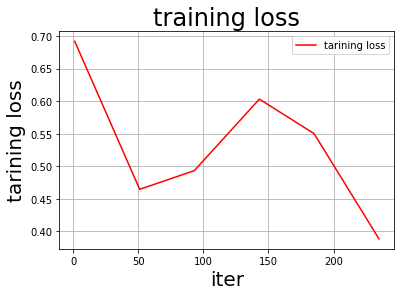

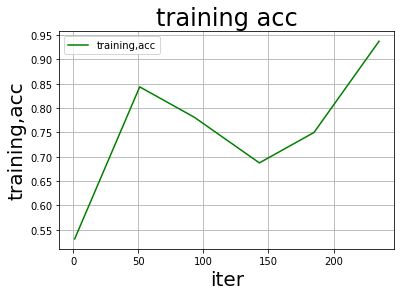

In [99]:
model=RNN()
train(model)

In [109]:
model_state_dict=paddle.load('model_final.pdparams')
model=RNN()
model.set_state_dict(model_state_dict)
model.eval()

accs,losses=[],[]
samples,predictions=[],[]
grounds=[]
for batch_id,data in enumerate(eval_loader()):
    x=data[0]
    y=data[1]

    for sent in x:
        samples.append(sent.numpy())
    
    for label in y:
        grounds.append(label.numpy()[0])
    
    

    pred=model(x)

    for p in pred:
        idx=np.argmax(p.numpy())
        predictions.append(idx)

    loss=paddle.nn.functional.cross_entropy(pred,y)
    acc=paddle.metric.accuracy(pred,y)
    accs.append(acc.numpy()[0])
    losses.append(loss.numpy()[0])

avg_acc=np.mean(accs)
avg_loss=np.mean(losses)
print(f"acc:{avg_acc},loss:{avg_loss}")

acc:0.8197115659713745,loss:0.48863551020622253


In [110]:
samples[0].shape

(150,)

In [119]:
ind=54
print("数据:{}\n预测值:{}\n标签:{}".format(ids2str(list(samples[ind])),predictions[ind],grounds[ind]))

数据:2013年新假币…………速速转发你身边的朋友，让他们别上当了。。。@江宁公安在线<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
预测值:0
标签:0
